## Bilibli Test

In [85]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from urllib3.exceptions import ProtocolError

In [52]:
from scipy.io import netcdf
f = netcdf.netcdf_file('./data-netcdf.nc', 'w')
f.history = 'Created for Bilibili video scraping'
f.createDimension('time', 10)
time = f.createVariable('time', 'i', ('time',))
time[:] = np.arange(10)
time.units = 'days since 2008-01-01'
f.close()

In [21]:
import datetime

In [23]:
str(datetime.datetime.now())

'2018-05-08 11:53:30.267682'

### Test API

In [2]:
import json
import requests

In [67]:
api_url_base = 'https://api.bilibili.com/x/article/archives?ids='

In [86]:
vid_list = ['411799','22786099','20728529','2122212','12312312312312']
# vid_list = ['411799231','232132786099','21320728529','2321122212','12312312312312']

In [87]:
rsp = requests.get(api_url_base + ','.join(vid_list))

In [88]:
rsp.json()

{'code': 0,
 'data': {'20728529': {'aid': 20728529,
   'attribute': 16512,
   'copyright': 1,
   'ctime': 1520938954,
   'desc': '作曲：Zaakdov；\r\n古钢琴也算钢琴对吧，嗯。',
   'duration': 97,
   'dynamic': '',
   'owner': {'face': 'http://i2.hdslb.com/bfs/face/f4c52f7f52b8d5aaad70b1afd2fb064b673b5466.jpg',
    'mid': 5760446,
    'name': '花儿不哭'},
   'pic': 'http://i0.hdslb.com/bfs/archive/007be987db7ea9a9222dbfdd9c41beede33c40b0.png',
   'pubdate': 1520938953,
   'rights': {'bp': 0,
    'download': 0,
    'elec': 0,
    'hd5': 0,
    'movie': 0,
    'no_reprint': 1,
    'pay': 0},
   'stat': {'aid': 20728529,
    'coin': 165,
    'danmaku': 16,
    'favorite': 146,
    'his_rank': 0,
    'like': 103,
    'now_rank': 0,
    'reply': 39,
    'share': 25,
    'view': 5400},
   'state': 0,
   'tid': 28,
   'title': '【钢琴原创】羽管键琴的激奏',
   'tname': '原创音乐',
   'videos': 1},
  '2122212': {'aid': 2122212,
   'attribute': 49168,
   'copyright': 1,
   'ctime': 1497430315,
   'desc': '自制 生化危机6 BIO6日语中字 艾达王ADA04流程

In [89]:
rsp.json()['code']==0

True

In [90]:
rsp.json()['data']

{'20728529': {'aid': 20728529,
  'attribute': 16512,
  'copyright': 1,
  'ctime': 1520938954,
  'desc': '作曲：Zaakdov；\r\n古钢琴也算钢琴对吧，嗯。',
  'duration': 97,
  'dynamic': '',
  'owner': {'face': 'http://i2.hdslb.com/bfs/face/f4c52f7f52b8d5aaad70b1afd2fb064b673b5466.jpg',
   'mid': 5760446,
   'name': '花儿不哭'},
  'pic': 'http://i0.hdslb.com/bfs/archive/007be987db7ea9a9222dbfdd9c41beede33c40b0.png',
  'pubdate': 1520938953,
  'rights': {'bp': 0,
   'download': 0,
   'elec': 0,
   'hd5': 0,
   'movie': 0,
   'no_reprint': 1,
   'pay': 0},
  'stat': {'aid': 20728529,
   'coin': 165,
   'danmaku': 16,
   'favorite': 146,
   'his_rank': 0,
   'like': 103,
   'now_rank': 0,
   'reply': 39,
   'share': 25,
   'view': 5400},
  'state': 0,
  'tid': 28,
  'title': '【钢琴原创】羽管键琴的激奏',
  'tname': '原创音乐',
  'videos': 1},
 '2122212': {'aid': 2122212,
  'attribute': 49168,
  'copyright': 1,
  'ctime': 1497430315,
  'desc': '自制 生化危机6 BIO6日语中字 艾达王ADA04流程攻略 声优皆川纯子 超清',
  'duration': 2037,
  'dynamic': '',
  'owne

In [4]:
fields_a = ['aid', 'tid','tname', 'title','pubdate','ctime', 'desc', 'state', 'duratioin','owner', 'stat']
fields_stat = ['aid', 'view', 'danmaku', 'reply', 'favorite', 'coin', 'share', 'now_rank', 'his_rank', 'like']

In [68]:
vid_list_return = list(rsp.json()['data'].keys())

In [70]:
[ [ rsp.json()['data'][ vid ]['stat'][fid] for fid in fields_stat] for vid in vid_list_return] 

[[20728529, 5328, 16, 39, 146, 165, 25, 0, 0, 103],
 [2122212, 1832, 18, 2, 17, 1, 4, 0, 0, 0],
 [22786099, 271990, 1852, 2904, 20534, 29984, 2573, 0, 11, 13793]]

In [74]:
# calculate difference
vid_list_fail = list( set(vid_list) - set(vid_list_return))

#### Functions for API

The code runs into request incompleteread errors. I consulted github here: https://github.com/tweepy/tweepy/issues/908

In [217]:
def modeit(filename, fields = None):
    
    if fields == None:
        fields = ['aid', 'view', 'danmaku', 'reply', 'favorite', 'coin', 'share', 'now_rank', 'his_rank', 'like']
    
    if os.path.exists(filename):
        mode_write = 'a' # append if already exists
    else:
        mode_write = 'w' # make a new file if not
        with open(filename, mode_write) as f:
            f.write( ','.join(fields) + '\n' )
    
    return mode_write


def crawler(vids):
    
    try:
        resp = requests.get( api_url_base + ','.join(vids) )
    except (ProtocolError, AttributeError):
        print('request protocal error')
    
    if resp.json()['code']==0:
        resp.json()['data']
        vid_list_return = list(resp.json()['data'].keys())
        vid_list_data = [ [ str(resp.json()['data'][ vid ]['stat'][fid]) for fid in fields_stat] for vid in vid_list_return]
        return [vid_data for vid_data in vid_list_data]
    else:
        print('Empty return from request')
        return []


        
def crawlerDump(vids, fileobj):
    
    try:
        resp = requests.get( api_url_base + ','.join(vids) )
    except (ProtocolError, AttributeError):
        print('request protocal error')
    
    resp.json()['data']
    vid_list_return = list(resp.json()['data'].keys())
    
    if vid_list_return:
        vid_list_data = [ [ str(resp.json()['data'][ vid ]['stat'][fid]) for fid in fields_stat] for vid in vid_list_return]
        # calculate difference
        # vid_list_fail = list( set(vids) - set(vid_list_return) )

        [VidDumpSingle(vid_data, fileobj) for vid_data in vid_list_data]
#         VidDumpBatch(vid_list_data, fileobj)
        
        # ElementRecorder(vid_list_fail, failed_file, failed_write)



In [212]:
def VidRecorderSingle(data, filename, mode=None):
    """
    Record a list of data
    """

    if mode==None:
        mode="a"
        
    data_dump = (','.join(data) )[:-1] + '\n'
    
    with open(filename, mode) as f:
        f.write( data_dump )

        
def VidDumpSingle(data, fileobj):
    """
    Record a list of data
    """

    data_dump = (','.join(data) )[:-1] + '\n'
    fileobj.write( data_dump )
    
    
def VidDumpBatch(dataArr, fileobj):
    """
    Record a list of data that should be recorded
    """
    
    data_dump = '\n'.join( [(','.join(data) )[:-1] for data in dataArr] ) + '\n'

    fileobj.write( data_dump )

        
def ElementRecorder(data, filename, mode=None):
    """
    Record a list of data
    """

    if mode==None:
        mode="a"
    
    with open(filename, mode) as f:
        [f.write( str(i) + '\n') for i in data]
        
        
def VidGenerator(start, seg):
    """
    """
    
    return [str(i) for i in list( range(start, start+seg) )]

def VidBatcher(vid_start, vid_end, bat_size, vids_size):
    """
    """
    
    list_f = []
    bat_list_f = []

    for i in range(vid_start, vid_end, vids_size ):

        bat_list_f = bat_list_f + [list(range(i, i + vids_size))]

        if (i - vid_start)%( vids_size * bat_size) == 0:
            list_f = list_f + [ bat_list_f ]
            bat_list_f = []
            
    return list_f

def VidBatcherSingle( vid_start, vid_end, vids_size ):
    """
    Batches ids within the range [vid_start, vid_end). Each list inside the batch contains vids_size vids.
    """
    
    bat_list_f = []
    
    for i in range(vid_start, vid_end - vids_size, vids_size ):
        
        bat_list_f = bat_list_f + [ list( range( i, i+ vids_size ) ) ]
        
    bat_list_f = bat_list_f + [ list( range( i+vids_size, vid_end ) ) ]
        
    return bat_list_f
    

Test functions

In [228]:
beg = 1
end = 5000
seg = 100
flag = beg
flag_falied = 0
batch_size = 5

modeit('data.csv')
data_mode = modeit('data.csv')

for i in range(beg, end, batch_size*seg):

    file_cache = []

    batch_start = i
    batch_end = i + seg * batch_size

    with open('data.csv', data_mode) as f:#Open data file

        for vids_in_run in VidBatcherSingle( batch_start, batch_end, seg ):#loop through this segment of ids
            vids_in_run = [ str(i) for i in vids_in_run ]  
            file_cache = file_cache +  crawler(vids_in_run)

#         print(file_cache)
        VidDumpBatch(file_cache, f)



In [ ]:
def func():
    upper = str.upper
    newlist = []
    append = newlist.append
    for word in oldlist:
        append(upper(word))
    return newlist

In [101]:
crawler( VidGenerator(1,10), 'data.csv', 'failed.csv')

In [66]:
my_data_test_path = "/Users/leima/OneDrive - University of New Mexico/data/mybilividdata/failed_vid_data.csv"
my_data_test = np.genfromtxt(my_data_test_path, delimiter=',')

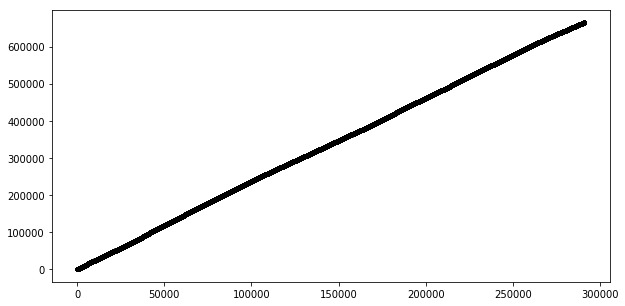

In [65]:
plt.figure(figsize=(10,5))
plt.plot(my_data_test[::1],'k.')
plt.show()

### The request is SLow

The dumping process is kind of fast but the request is slow. I need to use multiprocessing.

In [237]:
from multiprocessing import Pool
import time


In [231]:
np.sin(1)

0.8414709848078965

In [268]:
timestart = time.time()

with Pool(1) as p:
    result  = p.map( np.sin, range(1,100) )

timeend = time.time() 
print(timeend-timestart)

0.1235818862915039


In [267]:
timestart = time.time()

for i in range(1,10):
    with Pool(2) as p:
        result  = p.map( np.sin, range(1,1000000) )

timeend = time.time() 
print(timeend-timestart)

    

33.11035871505737


In [269]:
with open('test.test','w') as f:
    for i in range(1,2):
        with Pool(2) as p:
            result  = p.map( np.sin, range(1,1000000) )



In [271]:
# import  pathos.multiprocessingpathos.m  as mp
# p = mp.Pool(4)  # Processing Pool with four processors

# p.map(lambda x: x**2, range(10))


### General Tests

#### Test String Writing vs Number Writing

In [103]:
for i in np.range(1,1e5):
    
    with open('test_string', mode) as f:
            f.write(  )

1

In [109]:
with open('test.txt', 'a') as f:
    
    VidDumpSingle(['1','2','3','4','5','6'], f)